In [1]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error,accuracy_score,classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVR,SVR,SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.ensemble import VotingClassifier, BaggingClassifier, BaggingRegressor , AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA



def prRed(skk): print("\033[1m \033[91m {}\033[00m" .format(skk)) 
def prGreen(skk): print("\033[1m \033[92m {}\033[00m" .format(skk)) 
def prYellow(skk): print("\033[1m \033[93m {}\033[00m" .format(skk)) 
def prBlack(skk): print("\033[1m \033[98m {}\033[00m" .format(skk)) 

In [223]:
studf_test = pd.read_csv('student-mat.csv')
studf_test['grade'].unique()

array(['F', 'C', 'B', 'A'], dtype=object)

In [4]:
import pandas as pd
studf= pd.read_csv('student-mat.csv')

studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [5]:
studf[studf['school']=='GP'].count()
studf['school']= studf['school'].map({'GP':1, 'MS': 0}).astype(int)
studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,1,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,1,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,1,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,1,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [6]:
studf[studf['sex']=='F'].count()
studf['sex']= studf['sex'].map({'F':1, 'M': 0}).astype(int)
studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,1,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,1,1,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,1,1,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,1,1,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,1,1,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [7]:
studf[studf['address']=='R'].count()
studf['address']= studf['address'].map({'R':0, 'U': 1}).astype(int)
studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,1,18,1,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,1,1,17,1,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,1,1,15,1,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,1,1,15,1,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,1,1,16,1,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [8]:
studf[studf['famsize']=='GT3'].count()
studf['famsize']= studf['famsize'].map({'GT3':1, 'LE3': 0}).astype(int)
studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,1,18,1,1,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,1,1,17,1,1,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,1,1,15,1,0,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,1,1,15,1,1,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,1,1,16,1,1,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [9]:
studf[studf['Pstatus']=='T'].count()
studf['Pstatus']= studf['Pstatus'].map({'A':0, 'T': 1}).astype(int)
studf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,1,18,1,1,0,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,F
1,1,1,17,1,1,1,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,F
2,1,1,15,1,0,1,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,C
3,1,1,15,1,1,1,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,B
4,1,1,16,1,1,1,3,3,other,other,...,no,no,4,3,2,1,2,5,4,C


In [10]:
studf=pd.get_dummies(studf, columns=["Mjob"], prefix=["Mjob"])

In [11]:
studf=pd.get_dummies(studf, columns=["Fjob"], prefix=["Fjob"])

In [12]:
studf=pd.get_dummies(studf, columns=["reason"], prefix=["reason"])

In [13]:
studf=pd.get_dummies(studf, columns=["guardian"], prefix=["guardian"])

In [14]:
studf['schoolsup'].unique()
studf[studf['schoolsup']=='yes'].count()
studf[studf['schoolsup']=='no'].count()
studf['schoolsup']=studf['schoolsup'].map({'yes':0, 'no':1}).astype(int)

In [15]:
studf['famsup'].unique()
studf[studf['famsup']=='yes'].count()
studf['famsup']=studf['famsup'].map({'yes':1, 'no': 0}).astype(int)

In [16]:
studf['paid'].unique()
studf[studf['paid']=='yes'].count()
studf[studf['paid']=='no'].count()
studf['paid']=studf['paid'].map({'yes':0, 'no':1}).astype(int)

In [17]:
studf['activities'].unique()
studf[studf['activities']=='yes'].count()
studf[studf['activities']=='no'].count()
studf['activities']=studf['activities'].map({'yes':1, 'no':0}).astype(int)

In [18]:
studf['nursery'].unique()
studf[studf['nursery']=='yes'].count()
studf['nursery']=studf['nursery'].map({'yes': 1, 'no': 0}).astype(int)

In [19]:
studf[studf['higher']=='yes'].count()
studf['higher']=studf['higher'].map({'yes':1, 'no': 0}).astype(int)

In [20]:
studf[studf['internet']=='yes'].count()
studf[studf['internet']=='no'].count()
studf['internet']=studf['internet'].map({'yes': 1, 'no': 0}).astype(int)

In [21]:
studf[studf['romantic']=='yes'].count()
studf['romantic']=studf['romantic'].map({'yes':0, 'no': 1}).astype(int)

In [22]:
studf.columns.get_loc('grade')

26

In [25]:
y1 = studf['grade']
y2 = studf_test['grade']1


In [36]:
studf.drop('grade',axis=1,inplace=True)

In [23]:
studf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,0,0,21,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,0,0,18,0,0,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


### LAB4


In [224]:
studf.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grade',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [225]:
studf.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grade',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [226]:
y1 = studf['grade']
y2 = studf_test['grade']

In [227]:
y1

0      F
1      F
2      C
3      B
4      C
      ..
390    C
391    A
392    C
393    C
394    C
Name: grade, Length: 395, dtype: object

In [228]:
studf.shape

(395, 44)

In [229]:
studf.drop('grade', axis=1, inplace=True)


In [230]:
studf.shape

(395, 43)

In [231]:
studf


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,0,0,21,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,0,0,18,0,0,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [233]:
X = studf.iloc[:,:-1]

In [234]:
studf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,0,0,21,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,0,0,18,0,0,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [235]:
mm = MinMaxScaler()
    

In [236]:
XS_train_org1, XS_test_org1, yS_train1, yS_test1 = train_test_split(studf,y1,test_size=0.25, random_state=0)

In [237]:
XS_train = mm.fit_transform(XS_train_org1)

In [238]:
XS_test = mm.transform(XS_test_org1)

In [239]:
from sklearn.linear_model import LogisticRegression


softmax_reg = LogisticRegression(multi_class="auto",solver="lbfgs", max_iter=1000,random_state=0)
softmax_reg.fit(XS_train,yS_train1.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
print(softmax_reg.score(XS_test,yS_test1))

0.3434343434343434


In [241]:
y_LR = pd.Series([])

In [242]:
y1

0      F
1      F
2      C
3      B
4      C
      ..
390    C
391    A
392    C
393    C
394    C
Name: grade, Length: 395, dtype: object

In [243]:
for i in range(len(y1)):
    if(y1[i]=='A' or y1[i]=="B" or y1[i]=='C'):
        y_LR[i]="Pass"
    else:
        y_LR[i]="Fail"    

In [244]:
y_LR

0      Fail
1      Fail
2      Pass
3      Pass
4      Pass
       ... 
390    Pass
391    Pass
392    Pass
393    Pass
394    Pass
Length: 395, dtype: object

In [245]:
X_train_LR, X_test_LR, Y_train_LR, Y_test_LR = train_test_split(studf,y_LR,random_state=0, test_size=0.25)

In [246]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scale_LR=scaler.fit_transform(X_train_LR)
X_test_scale_LR=scaler.transform(X_test_LR)

In [247]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000,random_state=0)

In [248]:
logistic.fit(X_train_scale_LR,Y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
print("train accuracy after binomial conversion",logistic.score(X_train_scale_LR,Y_train_LR))
print("test accuracy after binomial conversion",logistic.score(X_test_scale_LR,Y_test_LR))

train accuracy after binomial conversion 0.8412162162162162
test accuracy after binomial conversion 0.8383838383838383


In [250]:
#SVM 

from sklearn.svm import SVC

sv= SVC(random_state=0,kernel='rbf',gamma=0.1,C=1)
sv.fit(XS_train,yS_train1)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [251]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = sv.predict(XS_test)
print(confusion_matrix(yS_test1,y_pred))

[[ 0  2 13  0]
 [ 0  4 20  0]
 [ 1  5 37  0]
 [ 0  0 17  0]]


In [252]:
##DT

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0,max_depth=2, criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(studf, y1,  random_state=0)

dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))




Accuracy on training set: 0.429
Accuracy on test set: 0.434


In [253]:
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

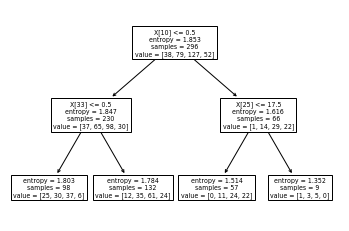

In [254]:
from sklearn import tree
Pl = tree.plot_tree(dtree)

#### LAB5

In [255]:
y_dt = pd.Series([])
for i in range(len(y1)):
    if(y1[i]=='A' or y1[i]=="B" or y1[i]=='C'):
        y_dt[i]="notF"
    else:
        y_dt[i]="F"   

In [256]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(studf,y_dt,random_state=0, test_size=0.25)

In [257]:
scaler=MinMaxScaler()
X_train_scale_5=scaler.fit_transform(X_train_5)
X_test_scale_5=scaler.transform(X_test_5)

In [258]:
param_grid  = {'max_depth':[5]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid,cv=5,iid = False,
                           scoring='roc_auc',return_train_score= True)
print(grid_search)
grid_search.fit(X_train_scale_5,y_train_5)
prRed(grid_search.best_params_)
prRed(grid_search.best_score_)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid=False, n_jobs=None, param_grid={'max_depth': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_au

In [259]:
X_train_5.shape

(296, 43)

In [260]:

grid_search.score(X_test_scale_5,y_test_5)
#y_pred_dt = grid_seach.predict(X_test_5)


0.5086083213773314

In [261]:
y_dt.unique()

array(['F', 'notF'], dtype=object)

In [262]:
y_pred_dt = grid_search.predict(X_test_scale_5)

print(classification_report(y_test_5,y_pred_dt,digits=4))
print(confusion_matrix(y_test_5,y_pred_dt))
recall_score(y_test_5,y_pred_dt, average='micro')

              precision    recall  f1-score   support

           F     0.4444    0.2353    0.3077        17
        notF     0.8556    0.9390    0.8953        82

    accuracy                         0.8182        99
   macro avg     0.6500    0.5872    0.6015        99
weighted avg     0.7850    0.8182    0.7944        99

[[ 4 13]
 [ 5 77]]


NameError: name 'recall_score' is not defined

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test_5,y_pred_dt, average='micro')

In [ ]:
# Since Logisitic Regression is with multi class and F and notF is binary class.
# So reloaded the original values of A B C F and ran Logistic with original grades.

In [ ]:

y_pred_lr = LR.predict(X_test_scale_LR)
print(confusion_matrix(yS_test1,y_pred_lr))
print(classification_report(yS_test1,y_pred_lr,digits=4,))
print(recall_score(yS_test1,y_pred_lr, average='micro'))


#### END of Part A LAB5

#### LAB6

In [272]:
studf.shape

(395, 43)

In [249]:
y1

0      240
1      290
2      530
3      520
4      720
      ... 
121    390
122    480
123    670
124    395
125    590
Name: Calories, Length: 126, dtype: int64

In [263]:
#Q1
X_train_6a, X_test_6a, y_train_6a, y_test_6a = train_test_split(studf,y2,random_state=0, test_size=0.25)



In [264]:
scaler=MinMaxScaler()
X_train_scale_6a=scaler.fit_transform(X_train_6a)
X_test_scale_6a=scaler.transform(X_test_6a)

0      F
1      F
2      C
3      B
4      C
      ..
390    C
391    A
392    C
393    C
394    C
Name: grade, Length: 395, dtype: object

In [265]:
log_clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,multi_class='auto')
log_clf.fit(X_train_6a, y_train_6a)
dt_clf = DecisionTreeClassifier(max_depth =2 , random_state=0)
dt_clf.fit(X_train_6a, y_train_6a)
svm_clf = SVC(C = 10, probability = True, kernel = 'linear',random_state=0)
svm_clf.fit(X_train_6a, y_train_6a)

voting_clf = VotingClassifier(
    estimators=[('svc', svm_clf), ('dt', dt_clf) ,('lr', log_clf)], voting='hard')
voting_clf.fit(X_train_scale_6a, y_train_6a)

voting_clf_soft = VotingClassifier(
    estimators=[('svc', svm_clf), ('dt', dt_clf) ,('lr', log_clf)], voting='soft')
voting_clf_soft.fit(X_train_scale_6a, y_train_6a)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf,voting_clf_soft):
    clf.fit(X_train_scale_6a, y_train_6a)
    y_pred = clf.predict(X_test_scale_6a)
    print(clf.__class__.__name__, accuracy_score(y_test_6a, y_pred))

LogisticRegression 0.3434343434343434
DecisionTreeClassifier 0.40404040404040403
SVC 0.3333333333333333
VotingClassifier 0.3434343434343434
VotingClassifier 0.41414141414141414


In [257]:
prRed("\nTrain score of Voting classifier :")
print(voting_clf.score(X_train_scale_6a, y_train_6a))

prGreen("\nTest score of Soft Voting classifier :")
print(voting_clf_soft.score(X_test_scale_6a,y_test_6a))

  
Train score of Voting classifier :
0.597972972972973
  
Test score of Soft Voting classifier :
0.41414141414141414


In [270]:
#Q3-Q6

params = {'max_features': [5] ,'n_estimators': [100],'max_samples': [1]}
bagging = BaggingClassifier(dt_clf,random_state=0)
bagging.fit(X_train_scale_6a,y_train_6a)

grid_bag = GridSearchCV(bagging,params,cv=5,iid='False')
grid_bag.fit(X_train_scale_6a,y_train_6a)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=2,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                            

In [271]:
prRed("\nBagging with Decision Tree Classifier ->")
print("Best Params: ",grid_bag.best_params_)
print("Best Score :", grid_bag.best_score_)

  
Bagging with Decision Tree Classifier ->
Best Params:  {'max_features': 5, 'max_samples': 1, 'n_estimators': 100}
Best Score : 0.42905405405405406


In [134]:
#Q7-10

params = {'max_features': [2,5,10,20] ,'n_estimators': [50, 100, 200, 500],'learning_rate': [0.1, 0.25, 0.5, 0.75, 1]}
grad_boost = GradientBoostingClassifier(random_state=0)

grid_gboost = GridSearchCV(grad_boost,params,cv=5,iid='False')
grid_gboost.fit(X_train_scale_6,y_train_6)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
Bagging with Decision Tree Classifier ->
Best Params:  {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 200}
Best Score : 0.43243243243243246

In [135]:
prRed("\nGradient Boosting Classifier ")
print("Best Params: ",grid_gboost.best_params_)
print("Best Score :", grid_gboost.best_score_)

  
Gradient Boosting Classifier 
Best Params:  {'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 50}
Best Score : 0.48986486486486486


In [143]:
gboost = GradientBoostingClassifier(learning_rate=0.1,max_features=2,n_estimators=50, random_state=0)
gboost.fit(X_train_scale_6,y_train_6)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [154]:
y_pred_gboost_train = gboost.predict(X_train_scale_6)
y_pred_gboost_test = gboost.predict(X_test_scale_6)
print("Train :\n",classification_report(y_train_6,y_pred_gboost_train,digits=4,))

print("Test :\n",classification_report(y_test_6,y_pred_gboost_test,digits=4,))

Train :
               precision    recall  f1-score   support

           A     0.9231    0.6316    0.7500        38
           B     0.8462    0.6962    0.7639        79
           C     0.6927    0.9764    0.8105       127
           F     1.0000    0.5000    0.6667        52

    accuracy                         0.7736       296
   macro avg     0.8655    0.7010    0.7478       296
weighted avg     0.8172    0.7736    0.7650       296

Test :
               precision    recall  f1-score   support

           A     0.5000    0.1333    0.2105        15
           B     0.4118    0.2917    0.3415        24
           C     0.4384    0.7442    0.5517        43
           F     0.8000    0.2353    0.3636        17

    accuracy                         0.4545        99
   macro avg     0.5375    0.3511    0.3668        99
weighted avg     0.5034    0.4545    0.4168        99



In [141]:
y_pred_gboost = grid_gboost.predict(X_test_6)

print(classification_report(X_train_scale_6, y_pred_gboost, digits=4,))

print("Macro Avg Recall for Train :",recall_score(X_train_scale_6, average='macro'))

ValueError: Found input variables with inconsistent numbers of samples: [296, 99]

## LAB7

In [342]:
for i in range(len(y2)):
    if(y1[i]=='A' or y1[i]=="B" or y1[i]=='C'):
        y2[i]="not Fail"
    else:
        y2[i]="Fail"    

In [343]:
studf_pca = studf

In [599]:
X_train_org_7a, X_test_org_7a, y_train_7a, y_test_7a = train_test_split(studf_pca,y2,random_state=0, test_size=0.25)


In [600]:
scaler = MinMaxScaler()
X_train_7a = scaler.fit_transform(X_train_org_7a)
X_test_7a = scaler.transform(X_test_org_7a)

In [601]:
pca  = PCA(0.95)
pca.fit(X_train_7a,y_train_7a)
X_train_7a_pca = pca.fit_transform(X_train_7a)
X_test_7a_pca = pca.transform(X_test_7a)

In [602]:
svc = SVC(C=10,gamma=0.05,kernel='rbf',random_state=0)

In [603]:
svc.fit(X_train_7a_pca,y_train_7a)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [604]:
prRed("\n SVC on PCA transformed dataset : ")
print("Train Score -->", svc.score(X_train_7a_pca,y_train_7a))
print("Test Score  -->", svc.score(X_test_7a_pca,y_test_7a))


  
 SVC on PCA transformed dataset : 
Train Score --> 0.9324324324324325
Test Score  --> 0.8585858585858586


In [605]:
#y_te_7bi.reshape(-1,1)
y_pred_ = svc.predict(X_test_7a_pca)

In [606]:
y_test_7a_bi.value_counts()

1    82
0    17
Name: grade, dtype: int64

In [607]:
y_test_7a_bi = y_test_7a.replace('Fail',0)
#y_test_7a_bi = y_test_7a.replace('Fail',0)

In [608]:
y_test_7a_bi = y_test_7a_bi.replace('not Fail',1)

In [609]:
for i in range(len(y_pred_)):
    if y_pred_[i]=='not Fail':
        y_pred_[i]= 1
    else:
        y_pred_[i]= 0 

In [610]:
y_test_7a_bi

329    1
318    1
317    1
65     1
59     1
      ..
239    0
63     1
245    1
154    1
311    1
Name: grade, Length: 99, dtype: int64

In [611]:
print("ROC AUC Score -->", roc_auc_score(y_test_7a_bi, y_pred_))

ROC AUC Score --> 0.6115494978479197


In [428]:
logit = LogisticRegression(C=1,solver='liblinear',penalty='l2',random_state=0)

In [445]:
logit.fit(X_train_7a_pca,y_train_7a)
logit.fit(X_test_7a_pca,y_test_7a)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [446]:
y_pred_logit = logit.predict(X_test_7a_pca)

In [447]:
type(y_pred_logit)

numpy.ndarray

In [448]:
for i in range(len(y_pred_logit)):
    if y_pred_logit[i]=='not Fail':
        y_pred_logit[i]= 1
    else:
        y_pred_logit[i]= 0 

In [432]:
y_pred_logit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=object)

In [449]:
print("ROC AUC Score -->", roc_auc_score(y_test_7a_bi, y_pred_logit))

ROC AUC Score --> 0.7058823529411764


In [ ]:
hello how are you 
this is fa

### PART B

In [453]:
import pandas as pd
import numpy as np
nutdf= pd.read_csv('Nutritional Data for Fast Foods.csv')
nutdf.head()

,Unnamed: 0,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0
1,1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0
2,2,McDonald's,?,Burger,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0
3,3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0
4,4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0


In [454]:
nutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
Unnamed: 0              126 non-null int64
Fast Food Restaurant    126 non-null object
Item                    126 non-null object
Type                    126 non-null object
Serving Size (g)        126 non-null int64
Calories                126 non-null int64
Total Fat (g)           122 non-null float64
Saturated Fat (g)       126 non-null float64
Trans Fat (g)           114 non-null float64
Sodium (mg)             121 non-null float64
Carbs (g)               126 non-null float64
Sugars (g)              126 non-null float64
Protein (g)             122 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 12.9+ KB


In [455]:
nutdf.describe(include=['O'])

,Fast Food Restaurant,Item,Type
count,126,126,126
unique,12,101,6
top,Jack in the Box,?,Burger
freq,13,19,69


In [456]:
nutdf.drop('Unnamed: 0',axis=1,inplace=True)
nutdf

,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0
2,McDonald's,?,Burger,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,In-N-Out Burger,Hamburger w/Onion,Burger,243,390,19.0,5.0,0.0,650.0,39.0,10.0,16.0
122,In-N-Out Burger,Cheeseburger w/Onion,Burger,268,480,27.0,10.0,0.5,1000.0,39.0,10.0,22.0
123,In-N-Out Burger,Double-Double w/Onion,Burger,330,670,41.0,18.0,1.0,1440.0,39.0,10.0,37.0
124,In-N-Out Burger,French Fries,French Fries,125,395,18.0,5.0,0.0,245.0,54.0,0.0,7.0


In [457]:
# #nutdf_1=nutdf.groupby(['Type'])
# # nutdf_grouped=nutdf_1.transform(lambda grp: grp.fillna(grp.mean()))
# nutdf_grouped['Trans Fat (g)'].mean()
# nutdf_grouped['Total Fat (g)'].sum()
# nutdf_grouped['Sodium (mg)'].mean()
# nutdf_grouped[['Fast Food Restaurant','Item','Type','Serving Size (g)','Calories','Total Fat (g)','Saturated Fat (g)','Trans Fat (g)','Sodium (mg)','Carbs (g)','Sugars (g)','Protein (g)']]=nutdf[['Fast Food Restaurant','Item','Type','Serving Size (g)','Calories','Total Fat (g)','Saturated Fat (g)','Trans Fat (g)','Sodium (mg)','Carbs (g)','Sugars (g)','Protein (g)']]
# nutdf_grouped['Trans Fat (g)']=nutdf_1['Trans Fat (g)'].apply(lambda grp:grp.fillna(grp.mean()))
# nutdf_grouped['Total Fat (g)']=nutdf_1['Total Fat (g)'].apply(lambda grp:grp.fillna(grp.mean()))
# nutdf_grouped['Sodium (mg)']=nutdf_1['Sodium (mg)'].apply(lambda grp:grp.fillna(grp.mean()))
# nutdf_grouped['Protein (g)']=nutdf_1['Protein (g)'].apply(lambda grp:grp.fillna(grp.mean()))
# nutdf_grouped['Fast Food Restaurant'].unique()
# F= pd.get_dummies(nutdf_grouped['Fast Food Restaurant'])
# nutdf_grouped= pd.concat([nutdf_grouped,F], axis=1)
# nutdf_grouped.drop('Fast Food Restaurant',axis=1,inplace=True)
# nutdf_grouped.drop('Item',axis=1,inplace=True)
# nutdf_grouped['Protein (g)'].mean()
# nutdf_grouped['Type'].unique()
# t= pd.get_dummies(nutdf_grouped['Type'])
# nutdf_grouped= pd.concat([nutdf_grouped,t], axis=1)
# nutdf_grouped.drop('Type',axis=1, inplace=True)
# nutdf_grouped.shape
# c=nutdf[["Type","Total Fat (g)"]].groupby("Type")
# a=c.apply(lambda grp: grp.fillna(grp.mean()))
# a.sum()

In [458]:
nutdf_1=nutdf.groupby(['Type'])
nutdf_grouped=nutdf_1.transform(lambda grp: grp.fillna(grp.mean()))

In [459]:
nutdf_grouped

,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0
1,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0
2,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0
3,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0
4,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0
...,...,...,...,...,...,...,...,...,...
121,243,390,19.0,5.0,0.0,650.0,39.0,10.0,16.0
122,268,480,27.0,10.0,0.5,1000.0,39.0,10.0,22.0
123,330,670,41.0,18.0,1.0,1440.0,39.0,10.0,37.0
124,125,395,18.0,5.0,0.0,245.0,54.0,0.0,7.0


In [460]:
print(nutdf_grouped['Trans Fat (g)'].mean())
print(nutdf_grouped['Total Fat (g)'].sum())
print(nutdf_grouped['Sodium (mg)'].mean())

0.8253400363077783
3580.283076923077
978.0774003774004


In [461]:
nutdf_grouped[['Fast Food Restaurant','Item','Type','Serving Size (g)','Calories','Total Fat (g)','Saturated Fat (g)','Trans Fat (g)','Sodium (mg)','Carbs (g)','Sugars (g)','Protein (g)']]=nutdf[['Fast Food Restaurant','Item','Type','Serving Size (g)','Calories','Total Fat (g)','Saturated Fat (g)','Trans Fat (g)','Sodium (mg)','Carbs (g)','Sugars (g)','Protein (g)']]


In [462]:
# nutdf_grouped['Sodium (mg)']=(nutdf_1['Sodium (mg)'].apply(lambda grp:grp.fillna(grp.mean()))
# nutdf_grouped['Protein (g)']=(nutdf_1['Protein (g)'].apply(lambda grp:grp.fillna(grp.mean()))

In [463]:
nutdf_grouped['Sodium (mg)']=(nutdf_1['Sodium (mg)'].apply(lambda grp:grp.fillna(grp.mean())))


In [464]:
nutdf_grouped['Protein (g)']=(nutdf_1['Protein (g)'].apply(lambda grp:grp.fillna(grp.mean())))

In [465]:
nutdf_grouped['Trans Fat (g)']=nutdf_1['Trans Fat (g)'].apply(lambda grp:grp.fillna(grp.mean()))
nutdf_grouped['Total Fat (g)']=nutdf_1['Total Fat (g)'].apply(lambda grp:grp.fillna(grp.mean()))

In [466]:
nutdf_grouped['Fast Food Restaurant'].unique()
dum = pd.get_dummies(nutdf_grouped['Fast Food Restaurant'])
nutdf_grouped= pd.concat([nutdf_grouped,dum], axis=1)

In [467]:
nutdf_grouped.drop('Fast Food Restaurant',axis=1,inplace=True)



In [468]:
nutdf_grouped.drop('Item',axis=1,inplace=True)


In [469]:
nutdf_grouped['Type']

0            Burger
1            Burger
2            Burger
3            Burger
4            Burger
           ...     
121          Burger
122          Burger
123          Burger
124    French Fries
125       Milkshake
Name: Type, Length: 126, dtype: object

In [470]:
nutdf_grouped['Type'].unique()
t_dum= pd.get_dummies(nutdf_grouped['Type'])
nutdf_grouped= pd.concat([nutdf_grouped,t_dum], axis=1)

In [471]:
t_dum

,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
121,0,1,0,0,0,0
122,0,1,0,0,0,0
123,0,1,0,0,0,0
124,0,0,0,1,0,0


In [472]:
nutdf_grouped

,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Type,...,Sonic,Wendy's,Whataburger,White Castle,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake
0,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0,Burger,...,0,0,0,0,0,1,0,0,0,0
1,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0,Burger,...,0,0,0,0,0,1,0,0,0,0
2,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0,Burger,...,0,0,0,0,0,1,0,0,0,0
3,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0,Burger,...,0,0,0,0,0,1,0,0,0,0
4,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0,Burger,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,243,390,19.0,5.0,0.0,650.0,39.0,10.0,16.0,Burger,...,0,0,0,0,0,1,0,0,0,0
122,268,480,27.0,10.0,0.5,1000.0,39.0,10.0,22.0,Burger,...,0,0,0,0,0,1,0,0,0,0
123,330,670,41.0,18.0,1.0,1440.0,39.0,10.0,37.0,Burger,...,0,0,0,0,0,1,0,0,0,0
124,125,395,18.0,5.0,0.0,245.0,54.0,0.0,7.0,French Fries,...,0,0,0,0,0,0,0,1,0,0


In [473]:
nutdf

,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0
2,McDonald's,?,Burger,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,In-N-Out Burger,Hamburger w/Onion,Burger,243,390,19.0,5.0,0.0,650.0,39.0,10.0,16.0
122,In-N-Out Burger,Cheeseburger w/Onion,Burger,268,480,27.0,10.0,0.5,1000.0,39.0,10.0,22.0
123,In-N-Out Burger,Double-Double w/Onion,Burger,330,670,41.0,18.0,1.0,1440.0,39.0,10.0,37.0
124,In-N-Out Burger,French Fries,French Fries,125,395,18.0,5.0,0.0,245.0,54.0,0.0,7.0


In [474]:
y1 = nutdf_grouped['Calories']

In [475]:
nutdf_grouped.drop('Type',axis=1, inplace=True)
nutdf_grouped.shape

(126, 27)

In [476]:
nutdf_imputed= nutdf_grouped

In [477]:
nutdf_imputed.drop('Calories', axis=1, inplace=True)
    

In [478]:
X_df = nutdf_imputed


In [479]:
nut_imp_df = pd.DataFrame(nutdf_imputed)
nut_imp_df

,Serving Size (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Burger King,Carl's Jr.,...,Sonic,Wendy's,Whataburger,White Castle,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake
0,98,8.0,3.0,0.0,480.0,32.0,6.0,12.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,113,11.0,5.0,0.5,680.0,33.0,7.0,15.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,211,27.0,10.0,1.0,960.0,47.0,9.0,24.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,202,26.0,12.0,1.5,1100.0,41.0,10.0,30.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,270,40.0,15.0,1.5,1470.0,51.0,14.0,39.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,243,19.0,5.0,0.0,650.0,39.0,10.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
122,268,27.0,10.0,0.5,1000.0,39.0,10.0,22.0,0,0,...,0,0,0,0,0,1,0,0,0,0
123,330,41.0,18.0,1.0,1440.0,39.0,10.0,37.0,0,0,...,0,0,0,0,0,1,0,0,0,0
124,125,18.0,5.0,0.0,245.0,54.0,0.0,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [480]:
# for i in range(1,27):
#     print(X_mat[i])
#     i+1
    

In [481]:
nutdf_imputed

,Serving Size (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Burger King,Carl's Jr.,...,Sonic,Wendy's,Whataburger,White Castle,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake
0,98,8.0,3.0,0.0,480.0,32.0,6.0,12.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,113,11.0,5.0,0.5,680.0,33.0,7.0,15.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,211,27.0,10.0,1.0,960.0,47.0,9.0,24.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,202,26.0,12.0,1.5,1100.0,41.0,10.0,30.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,270,40.0,15.0,1.5,1470.0,51.0,14.0,39.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,243,19.0,5.0,0.0,650.0,39.0,10.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
122,268,27.0,10.0,0.5,1000.0,39.0,10.0,22.0,0,0,...,0,0,0,0,0,1,0,0,0,0
123,330,41.0,18.0,1.0,1440.0,39.0,10.0,37.0,0,0,...,0,0,0,0,0,1,0,0,0,0
124,125,18.0,5.0,0.0,245.0,54.0,0.0,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [482]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [483]:
X_train_org, X_test_org, y_train, y_test = train_test_split(nut_imp_df,y1,test_size=0.25, random_state=0)

In [484]:
#X_train_org1, X_test_org1, y_train1, y_test1 = train_test_split(X_mat,x1,test_size=0.25, random_state=0)

In [485]:
X_train_org

,Serving Size (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Burger King,Carl's Jr.,...,Sonic,Wendy's,Whataburger,White Castle,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake
62,80,12.000000,2.0,0.0,260.0,33.0,0.0,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
60,257,17.000000,2.0,0.0,1240.0,44.0,7.0,32.0,0,0,...,1,0,0,0,0,0,0,0,1,0
125,321,29.000000,19.0,1.0,320.0,72.0,65.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78,250,35.000000,14.0,1.0,1650.0,75.0,16.0,36.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,202,26.000000,12.0,1.5,1100.0,41.0,10.0,30.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,226,34.000000,16.0,1.5,1240.0,35.0,9.0,37.0,0,0,...,0,0,0,0,0,1,0,0,0,0
64,227,35.670769,11.0,1.0,1110.0,43.0,10.0,25.0,0,0,...,0,0,0,0,0,1,0,0,0,0
117,285,22.000000,4.0,0.0,1050.0,69.0,14.0,29.0,0,0,...,0,0,1,0,0,0,0,0,1,0
47,376,38.000000,26.0,1.5,300.0,101.0,88.0,13.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [486]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [488]:
X_train

array([[-1.33873809, -0.95028788, -1.04527996, ...,  3.07318149,
        -0.28365431, -0.34503278],
       [ 0.27859595, -0.65421121, -1.04527996, ..., -0.32539569,
         3.52541791, -0.34503278],
       [ 0.86339469,  0.0563728 ,  1.117835  , ..., -0.32539569,
        -0.28365431,  2.89827535],
       ...,
       [ 0.5344454 , -0.35813454, -0.79079584, ..., -0.32539569,
         3.52541791, -0.34503278],
       [ 1.36595612,  0.58931081,  2.0085294 , ..., -0.32539569,
        -0.28365431,  2.89827535],
       [-0.67170202, -0.53578054, -0.40906967, ..., -0.32539569,
        -0.28365431, -0.34503278]])

In [487]:
X_train

array([[-1.33873809, -0.95028788, -1.04527996, ...,  3.07318149,
        -0.28365431, -0.34503278],
       [ 0.27859595, -0.65421121, -1.04527996, ..., -0.32539569,
         3.52541791, -0.34503278],
       [ 0.86339469,  0.0563728 ,  1.117835  , ..., -0.32539569,
        -0.28365431,  2.89827535],
       ...,
       [ 0.5344454 , -0.35813454, -0.79079584, ..., -0.32539569,
         3.52541791, -0.34503278],
       [ 1.36595612,  0.58931081,  2.0085294 , ..., -0.32539569,
        -0.28365431,  2.89827535],
       [-0.67170202, -0.53578054, -0.40906967, ..., -0.32539569,
        -0.28365431, -0.34503278]])

In [57]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print("Training Score -->", lreg.score(X_train, y_train))
print("Test Score     -->", lreg.score(X_test, y_test))

Training Score --> 0.9858069698716861
Test Score     --> 0.9738501919623319


In [58]:
from  sklearn.linear_model import Ridge

x_range = [0.5, 15, 35]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)#alpha is the regulization term
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
R_trn_score = train_score_list
R_test_score = test_score_list

Text(0.5, 0, '$\\alpha$')

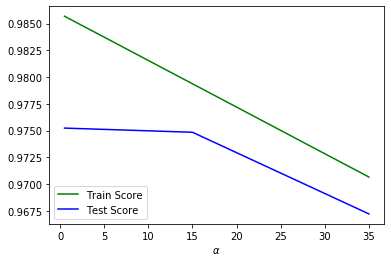

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [60]:
#######for Ridge
print(train_score_list)
print(test_score_list)


[0.9856935227710834, 0.9793783380699963, 0.9706555448524316]
[0.9752324368238628, 0.9748435025868748, 0.9672058622526352]


In [61]:
from sklearn.linear_model import Lasso
x_range = [0.01, 10, 35]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
L_trn_score = train_score_list
L_test_score = test_score_list

In [62]:
print(R_trn_score > L_trn_score)
print(R_test_score > L_test_score)

print("Lasso Train score -->",L_trn_score )
print("Lasso Test score  -->",L_test_score )
print("Ridge Train score -->",R_trn_score )
print("Ridge Test score  -->",R_test_score )

False
True
Lasso Train score --> [0.9858067149377853, 0.9677729618260756, 0.9239898678979078]
Lasso Test score  --> [0.9738978073187712, 0.9743954749087322, 0.9459937784720591]
Ridge Train score --> [0.9856935227710834, 0.9793783380699963, 0.9706555448524316]
Ridge Test score  --> [0.9752324368238628, 0.9748435025868748, 0.9672058622526352]


Text(0.5, 0, '$\\alpha$')

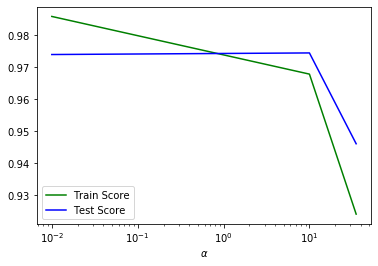

In [63]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [66]:
#######for Lasso
print(train_score_list)
print(test_score_list)


[0.9858067149377853, 0.9677729618260756, 0.9239898678979078]
[0.9738978073187712, 0.9743954749087322, 0.9459937784720591]


In [67]:
train_score_list = []
test_score_list = []

poly = PolynomialFeatures(2) # it automatically cretes the hot vectors for data if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
train_score_list.append(lreg.score(X_train_poly, y_train))
test_score_list.append(lreg.score(X_test_poly, y_test))

In [68]:
X_train_poly.shape


(94, 378)

In [69]:
X_test_poly.shape

(32, 378)

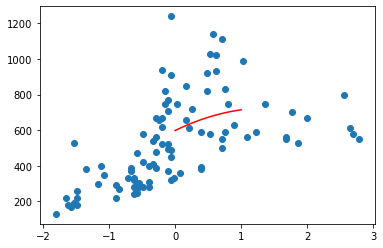

In [70]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

In [71]:
X_train_poly.shape

(94, 3)

In [72]:
from sklearn.linear_model import LinearRegression

lreg_poly = LinearRegression()
lreg_poly.fit(X_train_poly, y_train)

lreg.score(X_train_poly, y_train)

0.43273103102005067

In [73]:
y_predict

array([598.20526615, 600.02405091, 601.82972304, 603.62228254,
       605.4017294 , 607.16806363, 608.92128523, 610.6613942 ,
       612.38839053, 614.10227423, 615.8030453 , 617.49070373,
       619.16524953, 620.8266827 , 622.47500323, 624.11021114,
       625.73230641, 627.34128904, 628.93715904, 630.51991641,
       632.08956115, 633.64609326, 635.18951273, 636.71981957,
       638.23701377, 639.74109535, 641.23206429, 642.70992059,
       644.17466427, 645.62629531, 647.06481372, 648.49021949,
       649.90251263, 651.30169314, 652.68776102, 654.06071626,
       655.42055887, 656.76728885, 658.1009062 , 659.42141091,
       660.72880299, 662.02308243, 663.30424925, 664.57230343,
       665.82724497, 667.06907389, 668.29779017, 669.51339382,
       670.71588483, 671.90526322, 673.08152897, 674.24468208,
       675.39472257, 676.53165042, 677.65546564, 678.76616822,
       679.86375817, 680.94823549, 682.01960018, 683.07785223,
       684.12299165, 685.15501844, 686.17393259, 687.17

In [74]:
##LAB4 PART B
from sklearn.tree import DecisionTreeRegressor


RTree = DecisionTreeRegressor(min_samples_leaf =5, random_state=0).fit(X_train, y_train)


In [75]:
RTree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [76]:
print("Training RTree Score",RTree.score(X_train,y_train))
print("Test RTree Score",RTree.score(X_test,y_test))

Training RTree Score 0.9558531208783227
Test RTree Score 0.8447792566558974


### LAB5

In [77]:
lsvr = LinearSVR(random_state=0,max_iter=100000)
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}                 
grid_search_lsvr = GridSearchCV(lsvr,params,iid=False,cv=5)
grid_search_lsvr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=100000,
                                 random_state=0, tol=0.0001, verbose=0),
             iid=False, n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
print(grid_search_lsvr.best_params_)

{'C': 100}



#### LAB6

In [79]:
X_train_org_6, X_test_org_6, y_train_6, y_test_6 = train_test_split(nut_imp_df,y1,test_size=0.25, random_state=0)

sc = StandardScaler()
X_train_6 = sc.fit_transform(X_train_org_6)
X_test_6 = sc.transform(X_test_org_6)

In [80]:
#Q11-15
dt_reg = DecisionTreeRegressor(max_depth=5,random_state=0)
dt_reg.fit(X_train_6,y_train_6)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [81]:
params = {'max_features': [2,5,10] ,'n_estimators': [100, 200, 300, 500],'max_samples': [0.1, 0.5, 1]}
bagging = BaggingRegressor(dt_reg,random_state=0)

grid_bag = GridSearchCV(bagging, params, cv=5,iid='False')
grid_bag.fit(X_train_6,y_train_6)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=5,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fract

In [82]:
prRed("\nBagging Regressor with DT Regressor :\n")
print("\nBest Params : ",grid_bag.best_params_)
print("\nTraining score : ",grid_bag.score(X_train_6,y_train_6))
print("\nTest Score : ", grid_bag.score(X_test_6,y_test_6))

  
Bagging Regressor with DT Regressor :


Best Params :  {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 200}

Training score :  0.9654761530355035

Test Score :  0.9476920519114417


In [83]:
# Q16-18

params = {'max_features': [2,5,10] ,'n_estimators': [50, 100, 200],'max_depth':[5]}
grad_boostreg = GradientBoostingRegressor(random_state=0)

grid_gboostreg = GridSearchCV(grad_boostreg,params,cv=5,iid='False')
grid_gboostreg.fit(X_train_6,y_train_6)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [84]:
prRed("\nGradient Boosting Regressor ")
print("Best Params :",grid_gboostreg.best_params_)
print("Best Score : ",grid_gboostreg.best_score_)

  
Gradient Boosting Regressor 
Best Params : {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Best Score :  0.9253353673459428


In [85]:
gboost_reg = GradientBoostingRegressor(max_depth=5,max_features=5,n_estimators=200,random_state=0)
gboost_reg.fit(X_train_6,y_train_6)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=5, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
gboost_reg.score(X_test_6,y_test_6)

0.9423789629104994

In [87]:
y_pred_gboost = gboost_reg.predict(X_test_6)
mse_gboost = mean_squared_error(y_test_6,y_pred_gboost)
print("MSE GBoost_Reg : ",mse_gboost)

MSE GBoost_Reg :  3842.673980603187


# LAB7

In [537]:
X_train_org7, X_test_org7, y_train7, y_test7 = train_test_split(nut_imp_df,y1,test_size=0.25, random_state=0)

In [538]:
sc = StandardScaler()
X_train_7b = sc.fit_transform(X_train_org7)
X_test_7b = sc.transform(X_test_org7)

In [539]:
pca_b = PCA(0.95)
pca_b.fit(X_train_7b)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [540]:
X_train_pca_7b = pca_b.transform(X_train_7b)
X_test_pca_7b = pca_b.transform(X_test_7b)

In [541]:
X_train_pca_7b.shape

(94, 16)

In [542]:
from sklearn.linear_model import SGDRegressor

In [543]:
sgd = SGDRegressor(max_iter = 1000, random_state=0)

In [544]:
sgd.fit(X_train_pca_7b,y_train7)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [545]:
sgd.score(X_test_pca_7b,y_test7)

0.9303108283885866

In [546]:
from sklearn.manifold import LocallyLinearEmbedding

In [547]:
embed = LocallyLinearEmbedding(n_neighbors=10,n_components=2)

In [564]:
plt.scatter(embed.fit_transform(range(1,400),X_test_pca_7b))

ValueError: Expected 2D array, got 1D array instead:
array=[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224.
 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238.
 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252.
 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266.
 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280.
 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293. 294.
 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307. 308.
 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321. 322.
 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335. 336.
 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349. 350.
 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [554]:
X_test_pca_7b.shape

(32, 16)